In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import pytz

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
Monday = pd.read_excel('7 days load_1.xlsx')
Monday.head()
M = Monday.div(1000)
date_rng = pd.date_range(start='1/13/2019 00:15:00', end='1/21/2019 00:00:00', freq='15min')
date_rng
DATA = pd.DataFrame(date_rng, columns=['date'])
DATA['Electrical load kWt'] = M
DATA['datetime'] = pd.to_datetime(DATA['date'])
DATA = DATA.set_index('datetime', drop=True)
DATA.drop(['date'], axis=1, inplace=True)

In [18]:
df = DATA

In [27]:
import time, datetime
dt = datetime.datetime.strptime('2019-01-13 00:15', '%Y-%m-%d %H:%M')
# привести к новой таймзоне
dt = pytz.utc.localize(dt)
dt = datetime.datetime.timestamp(dt)

In [29]:
dt_lst  = []
for i in range(len(df)):
    dt_lst.append(dt)
    dt=dt+15*60

In [30]:
df['dt_tmstmp'] = dt_lst
df['dt'] = pd.to_datetime(df.dt_tmstmp, unit='s')

In [32]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    c=0
    lst=[]
    for i in range(len(df)):
        if c>3:
            c=0
        lst.append(c)
        c+=1
#     df['minute'] = df['minute'].dt.minute
    df['hour'] = df['dt'].dt.hour
    df['dayofweek'] = df['dt'].dt.dayofweek
    df['dayofmonth'] = df['dt'].dt.day
    df['15 min']=lst
    X = df[['hour','dayofweek','dayofmonth','15 min']]
    if label:
        y = df[label]
        return X, y
    return X

In [68]:
pd.get_dummies(x.drop(["dayofweek", "dayofmonth"], axis=1), columns=["hour","15 min"])

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,15 min_0,15 min_1,15 min_2,15 min_3
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-13 00:15:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2019-01-13 00:30:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2019-01-13 00:45:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-01-13 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-13 01:15:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2019-01-13 01:30:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2019-01-13 01:45:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-01-13 02:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-13 02:15:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
x = create_features(df)
y = df['Electrical load kWt']

In [35]:
x_test, y_test = x.iloc[192:288], y.iloc[192:288]
x_train, y_train = x.iloc[96:192], y.iloc[96:192]

In [66]:
x

,hour,dayofweek,dayofmonth,15 min
datetime,,,,
2019-01-13 00:15:00,0,6,13,0
2019-01-13 00:30:00,0,6,13,1
2019-01-13 00:45:00,0,6,13,2
2019-01-13 01:00:00,1,6,13,3
2019-01-13 01:15:00,1,6,13,0
2019-01-13 01:30:00,1,6,13,1
2019-01-13 01:45:00,1,6,13,2
2019-01-13 02:00:00,2,6,13,3
2019-01-13 02:15:00,2,6,13,0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_absolute_percentage_error: 2.6700758025859765
r2_score: 0.8472479630809928
median_absolute_error: 181.34093283841685
mean_absolute_error: 254.55561782246014
mean_squared_error: 113928.0855500487
mean_squared_log_error: 0.0014065193335788893


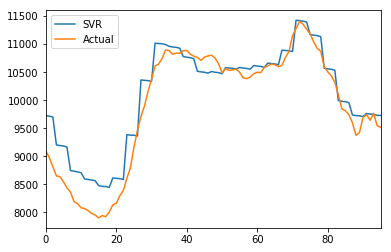

In [73]:
x = create_features(df)
y = df['Electrical load kWt']
x_test, y_test = x.iloc[192:288], y.iloc[192:288]
x_train, y_train = x.iloc[96:192], y.iloc[96:192]
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
model = SVR(kernel='rbf', C = 1000, gamma=0.001, epsilon=0.1)
# sc_x=StandardScaler()
sc_y=StandardScaler()
# X =sc_x.fit_transform(x_train)
X = pd.get_dummies(x_train.drop(["dayofweek", "dayofmonth"], axis=1), columns=["hour","15 min"])
Y =sc_y.fit_transform(pd.DataFrame(y_train))
model.fit(X,Y)
X_test = pd.get_dummies(x_test.drop(["dayofweek", "dayofmonth"], axis=1), columns=["hour","15 min"])
DATA = sc_y.inverse_transform(model.predict(X_test))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(DATA, y_test))
print('r2_score:', r2_score(DATA, y_test))
print('median_absolute_error:', median_absolute_error(DATA, y_test))
print('mean_absolute_error:', mean_absolute_error(DATA, y_test))
print('mean_squared_error:',  mean_squared_error(DATA, y_test))
print('mean_squared_log_error:', mean_squared_log_error(DATA, y_test))
DATA = pd.DataFrame(DATA)
DATA.columns = ['SVR']
DATA['Actual'] = y_test.values
DATA.plot()
plt.show()

In [65]:
X

array([[-1.66132477, -0.10259784, -0.10259784, -1.34164079],
       [-1.66132477, -0.10259784, -0.10259784, -0.4472136 ],
       [-1.66132477, -0.10259784, -0.10259784,  0.4472136 ],
       [-1.51686175, -0.10259784, -0.10259784,  1.34164079],
       [-1.51686175, -0.10259784, -0.10259784, -1.34164079],
       [-1.51686175, -0.10259784, -0.10259784, -0.4472136 ],
       [-1.51686175, -0.10259784, -0.10259784,  0.4472136 ],
       [-1.37239873, -0.10259784, -0.10259784,  1.34164079],
       [-1.37239873, -0.10259784, -0.10259784, -1.34164079],
       [-1.37239873, -0.10259784, -0.10259784, -0.4472136 ],
       [-1.37239873, -0.10259784, -0.10259784,  0.4472136 ],
       [-1.2279357 , -0.10259784, -0.10259784,  1.34164079],
       [-1.2279357 , -0.10259784, -0.10259784, -1.34164079],
       [-1.2279357 , -0.10259784, -0.10259784, -0.4472136 ],
       [-1.2279357 , -0.10259784, -0.10259784,  0.4472136 ],
       [-1.08347268, -0.10259784, -0.10259784,  1.34164079],
       [-1.08347268, -0.

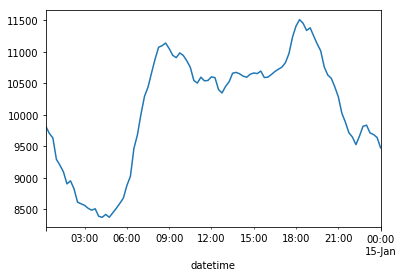

In [52]:
y_train.plot()

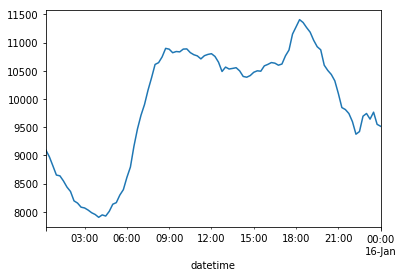

In [56]:
y_test.plot()

In [145]:
x = create_features(df)
y = df['Electrical load kWt']
x_test, y_test = x.iloc[205:215], y.iloc[205:215]
x_train, y_train = x.iloc[96:192], y.iloc[96:192]
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
model = SVR(kernel='precomputed', C=60, gamma=0.2)
sc_x=StandardScaler()
sc_y=StandardScaler()
X =sc_x.fit_transform(x_train)
Y =sc_y.fit_transform(pd.DataFrame(y_train))
model.fit(X,Y)
DATA = sc_y.inverse_transform(model.predict(sc_x.transform(x_test)))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(DATA, y_test))
print('r2_score:', r2_score(DATA, y_test))
print('median_absolute_error:', median_absolute_error(DATA, y_test))
print('mean_absolute_error:', mean_absolute_error(DATA, y_test))
print('mean_squared_error:',  mean_squared_error(DATA, y_test))
print('mean_squared_log_error:', mean_squared_log_error(DATA, y_test))
DATA = pd.DataFrame(DATA)
DATA.columns = ['SVR']
DATA['Actual'] = y_test.values
DATA.plot()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: X.shape[0] should be equal to X.shape[1]

In [ ]:
x = create_features(df)
y = df['Electrical load kWt']
x_test, y_test = x.iloc[695:703], y.iloc[695:703]
x_train, y_train = x.iloc[:694], y.iloc[:694]
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
model = SVR(kernel='rbf', C=75, gamma=0.5)
sc_x=StandardScaler()
sc_y=StandardScaler()
X =sc_x.fit_transform(x_train)
Y =sc_y.fit_transform(pd.DataFrame(y_train))
model.fit(X,Y)
df1 = sc_y.inverse_transform(model.predict(sc_x.transform(x_test)))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(df1, y_test))
print('r2_score:', r2_score(df1, y_test))
print('median_absolute_error:', median_absolute_error(df1, y_test))
print('mean_absolute_error:', mean_absolute_error(df1, y_test))
print('mean_squared_error:',  mean_squared_error(df1, y_test))
print('mean_squared_log_error:', mean_squared_log_error(df1, y_test))
df1 = pd.DataFrame(df1)
df1.columns = ['SVR']
df1['Actual'] = y_test.values
df1.plot()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_absolute_percentage_error: 2.8416616855037655
r2_score: -1.2986314976630946
median_absolute_error: 285.5633031589632
mean_absolute_error: 360.06539005763625
mean_squared_error: 179348.46993460716
mean_squared_log_error: 0.0011441953938534722


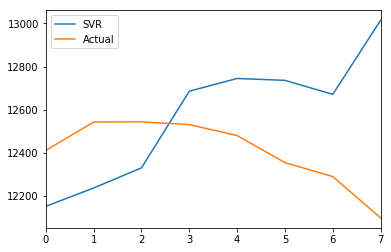

In [107]:
x = create_features(df)
y = df['Electrical load kWt']
x_test, y_test = x.iloc[743:751], y.iloc[743:751]
x_train, y_train = x.iloc[:742], y.iloc[:742]
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
model = SVR(kernel='rbf', C=40, gamma=0.9)
sc_x=StandardScaler()
sc_y=StandardScaler()
X =sc_x.fit_transform(x_train)
Y =sc_y.fit_transform(pd.DataFrame(y_train))
model.fit(X,Y)
df2 = sc_y.inverse_transform(model.predict(sc_x.transform(x_test)))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(df2, y_test))
print('r2_score:', r2_score(df2, y_test))
print('median_absolute_error:', median_absolute_error(df2, y_test))
print('mean_absolute_error:', mean_absolute_error(df2, y_test))
print('mean_squared_error:',  mean_squared_error(df2, y_test))
print('mean_squared_log_error:', mean_squared_log_error(df2, y_test))
df2 = pd.DataFrame(df2)
df2.columns = ['SVR']
df2['Actual'] = y_test.values
df2.plot()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_absolute_percentage_error: 6.324045988955078
r2_score: -4.495287760334141
median_absolute_error: 680.96607358662
mean_absolute_error: 698.8453537222241
mean_squared_error: 501511.5333942731
mean_squared_log_error: 0.004376077688300925


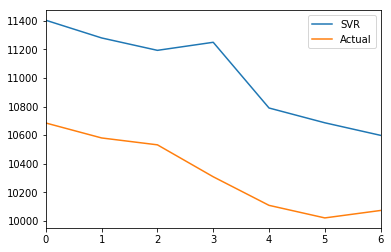

In [114]:
x = create_features(df)
y = df['Electrical load kWt']
x_test, y_test = x.iloc[718:725], y.iloc[718:725]
x_train, y_train = x.iloc[:717], y.iloc[:717]
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import warnings
model = SVR(kernel='rbf', C=10, gamma=0.9)
sc_x=StandardScaler()
sc_y=StandardScaler()
X =sc_x.fit_transform(x_train)
Y =sc_y.fit_transform(pd.DataFrame(y_train))
model.fit(X,Y)
df3 = sc_y.inverse_transform(model.predict(sc_x.transform(x_test)))
print('mean_absolute_percentage_error:', mean_absolute_percentage_error(df3, y_test))
print('r2_score:', r2_score(df3, y_test))
print('median_absolute_error:', median_absolute_error(df3, y_test))
print('mean_absolute_error:', mean_absolute_error(df3, y_test))
print('mean_squared_error:',  mean_squared_error(df3, y_test))
print('mean_squared_log_error:', mean_squared_log_error(df3, y_test))
df3 = pd.DataFrame(df3)
df3.columns = ['SVR']
df3['Actual'] = y_test.values
df3.plot()
plt.show()